In [ ]:
!pip install langdetect

     |████████████████████████████████| 981 kB 2.7 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=07ad00c549eb6da8fdf3cc3a6455b818a898a552dd0e086e24214490fb235ba7
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
!pip install better_profanity

     |████████████████████████████████| 46 kB 1.2 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import os
import langdetect

import nltk
from nltk.tokenize import TweetTokenizer
import re
import string
from better_profanity import profanity
import seaborn as sn
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/Ensemble learning/cyberbullying_tweets.csv")

In [ ]:
df.groupby("cyberbullying_type").count()

tweet_text
cyberbullying_type             
age                        7992
ethnicity                  7961
gender                     7973
not_cyberbullying          7945
other_cyberbullying        7823
religion                   7998

### Base Processing
In this section, we aim to clean our tweets (removing stopwords and Lemmatizing) and build simple features (count of hashtags, mentions and profanity words).

In [ ]:
lst_stopwords = nltk.corpus.stopwords.words("english")

In [ ]:
# Deal with swear-words/profanity
with open("/content/drive/Shareddrives/Ensemble learning/bad-words.txt","r") as f:
    profanity_lst = f.read().splitlines()

In [ ]:
# Preprocessing tweets
def preprocess_tweets(text, stemm=False, lemm=True, lst_stopwords=None):

    # Lowercase, remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())

    # Split text by space
    text_lst = text.split()

    # Remove stop-words
    if lst_stopwords is not None:
        text_lst = [word for word in text_lst if word not in lst_stopwords]

    # Stemming
    if stemm:
        ps = nltk.stem.porter.PorterStemmer()
        text_lst = [ps.stem(word) for word in text_lst]

    # Lemmatisation
    if lemm:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        text_lst = [lem.lemmatize(word) for word in text_lst]

    text = " ".join(text_lst)
    return text

In [ ]:
df["clean_tweet"] = df["tweet_text"].apply(lambda x: preprocess_tweets(x, lst_stopwords=lst_stopwords))

In [ ]:
df["nb_hashtags"] = df["tweet_text"].apply(lambda x: len(re.findall("#", x)))

In [ ]:
df["nb_atts"] = df["tweet_text"].apply(lambda x: len(re.findall("@", x)))

In [ ]:
df["is_rt"] = df["tweet_text"].apply(lambda x: len(re.findall("RT", x)))

In [ ]:
df["tweet_length"] = df["tweet_text"].apply(lambda x: len(x))

In [ ]:
# Count profanity words
def profanity_count(text, profanity_lst):
    text_lst = text.split() # split text on spaces
    profanity_cnt = 0
    for word in text_lst:
        if word in profanity_lst:
            profanity_cnt += 1
    return profanity_cnt

In [ ]:
df["profanity_cnt"] = df["clean_tweet"].apply(lambda x: profanity_count(x, profanity_lst))

In [ ]:
df

tweet_text cyberbullying_type  \
0      In other words #katandandre, your food was cra...  not_cyberbullying   
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   
...                                                  ...                ...   
47687  Black ppl aren't expected to do anything, depe...          ethnicity   
47688  Turner did not withhold his disappointment. Tu...          ethnicity   
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity   
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity   
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity   

                                             clean_tweet  nb_hashtags  \
0                 word katandandre food crapilicious mkr            2   
1      aussietv white mkr theblock imacelebrityau tod...           10   
2         xochitlsuckkks classy whore red velvet cupcake            0   
3      jason_gio meh p thanks head concerned another ...            0   
4      rudhoeenglish isi account pretending kurdish a...            0   
...                                                  ...          ...   
47687  black ppl arent expected anything depended any...            0   
47688  turner withhold disappointment turner called c...            0   
47689  swear god dumb nigger bitch got bleach hair re...            0   
47690  yea fuck rt therealexel youre nigger fucking u...            0   
47691  bro u gotta chill rt chillshrammy dog fuck kp ...            0   

       nb_atts  is_rt  tweet_length  profanity_cnt  
0            0      0            61              0  
1            0      0           115              0  
2            1      0            60              1  
3            1      0           103              1  
4            1      0           103              0  
...        ...    ...           ...            ...  
47687        0      0           234              1  
47688        0      0           276              3  
47689        0      0           104              6  
47690        1      1            90              6  
47691        1      1            76              4  

[47692 rows x 8 columns]

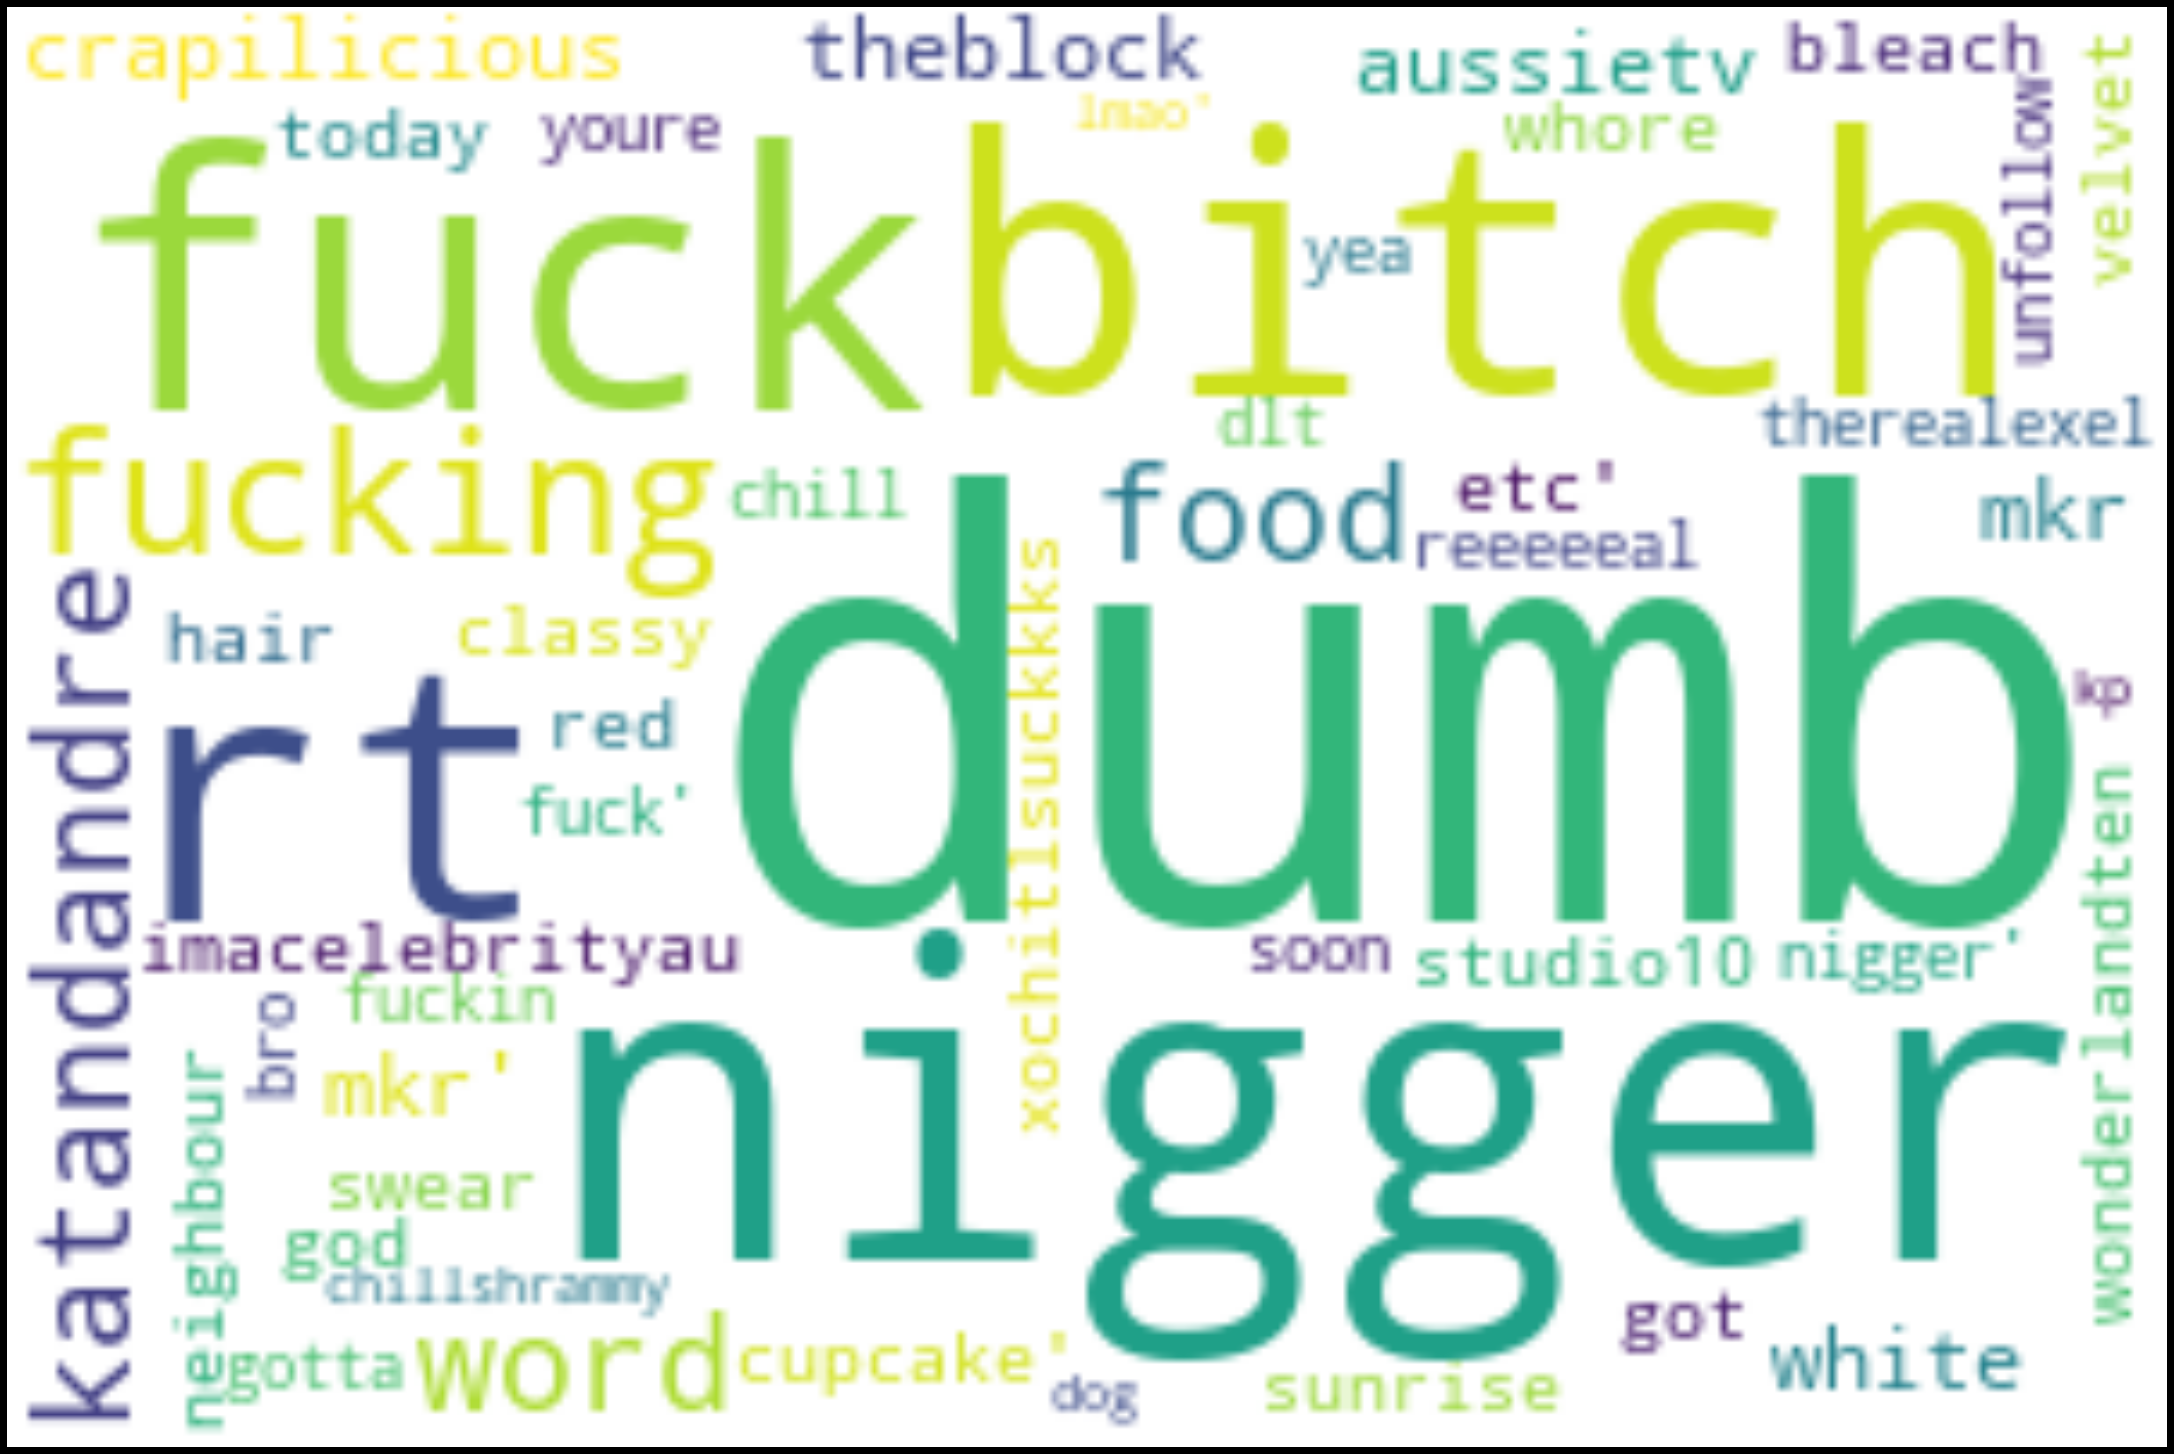

In [ ]:
# We want to explore which words comes up more, to do so we build word cloud visualization
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df.clean_tweet.values
wordcloud = WordCloud(
    width = 300,
    height = 200,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

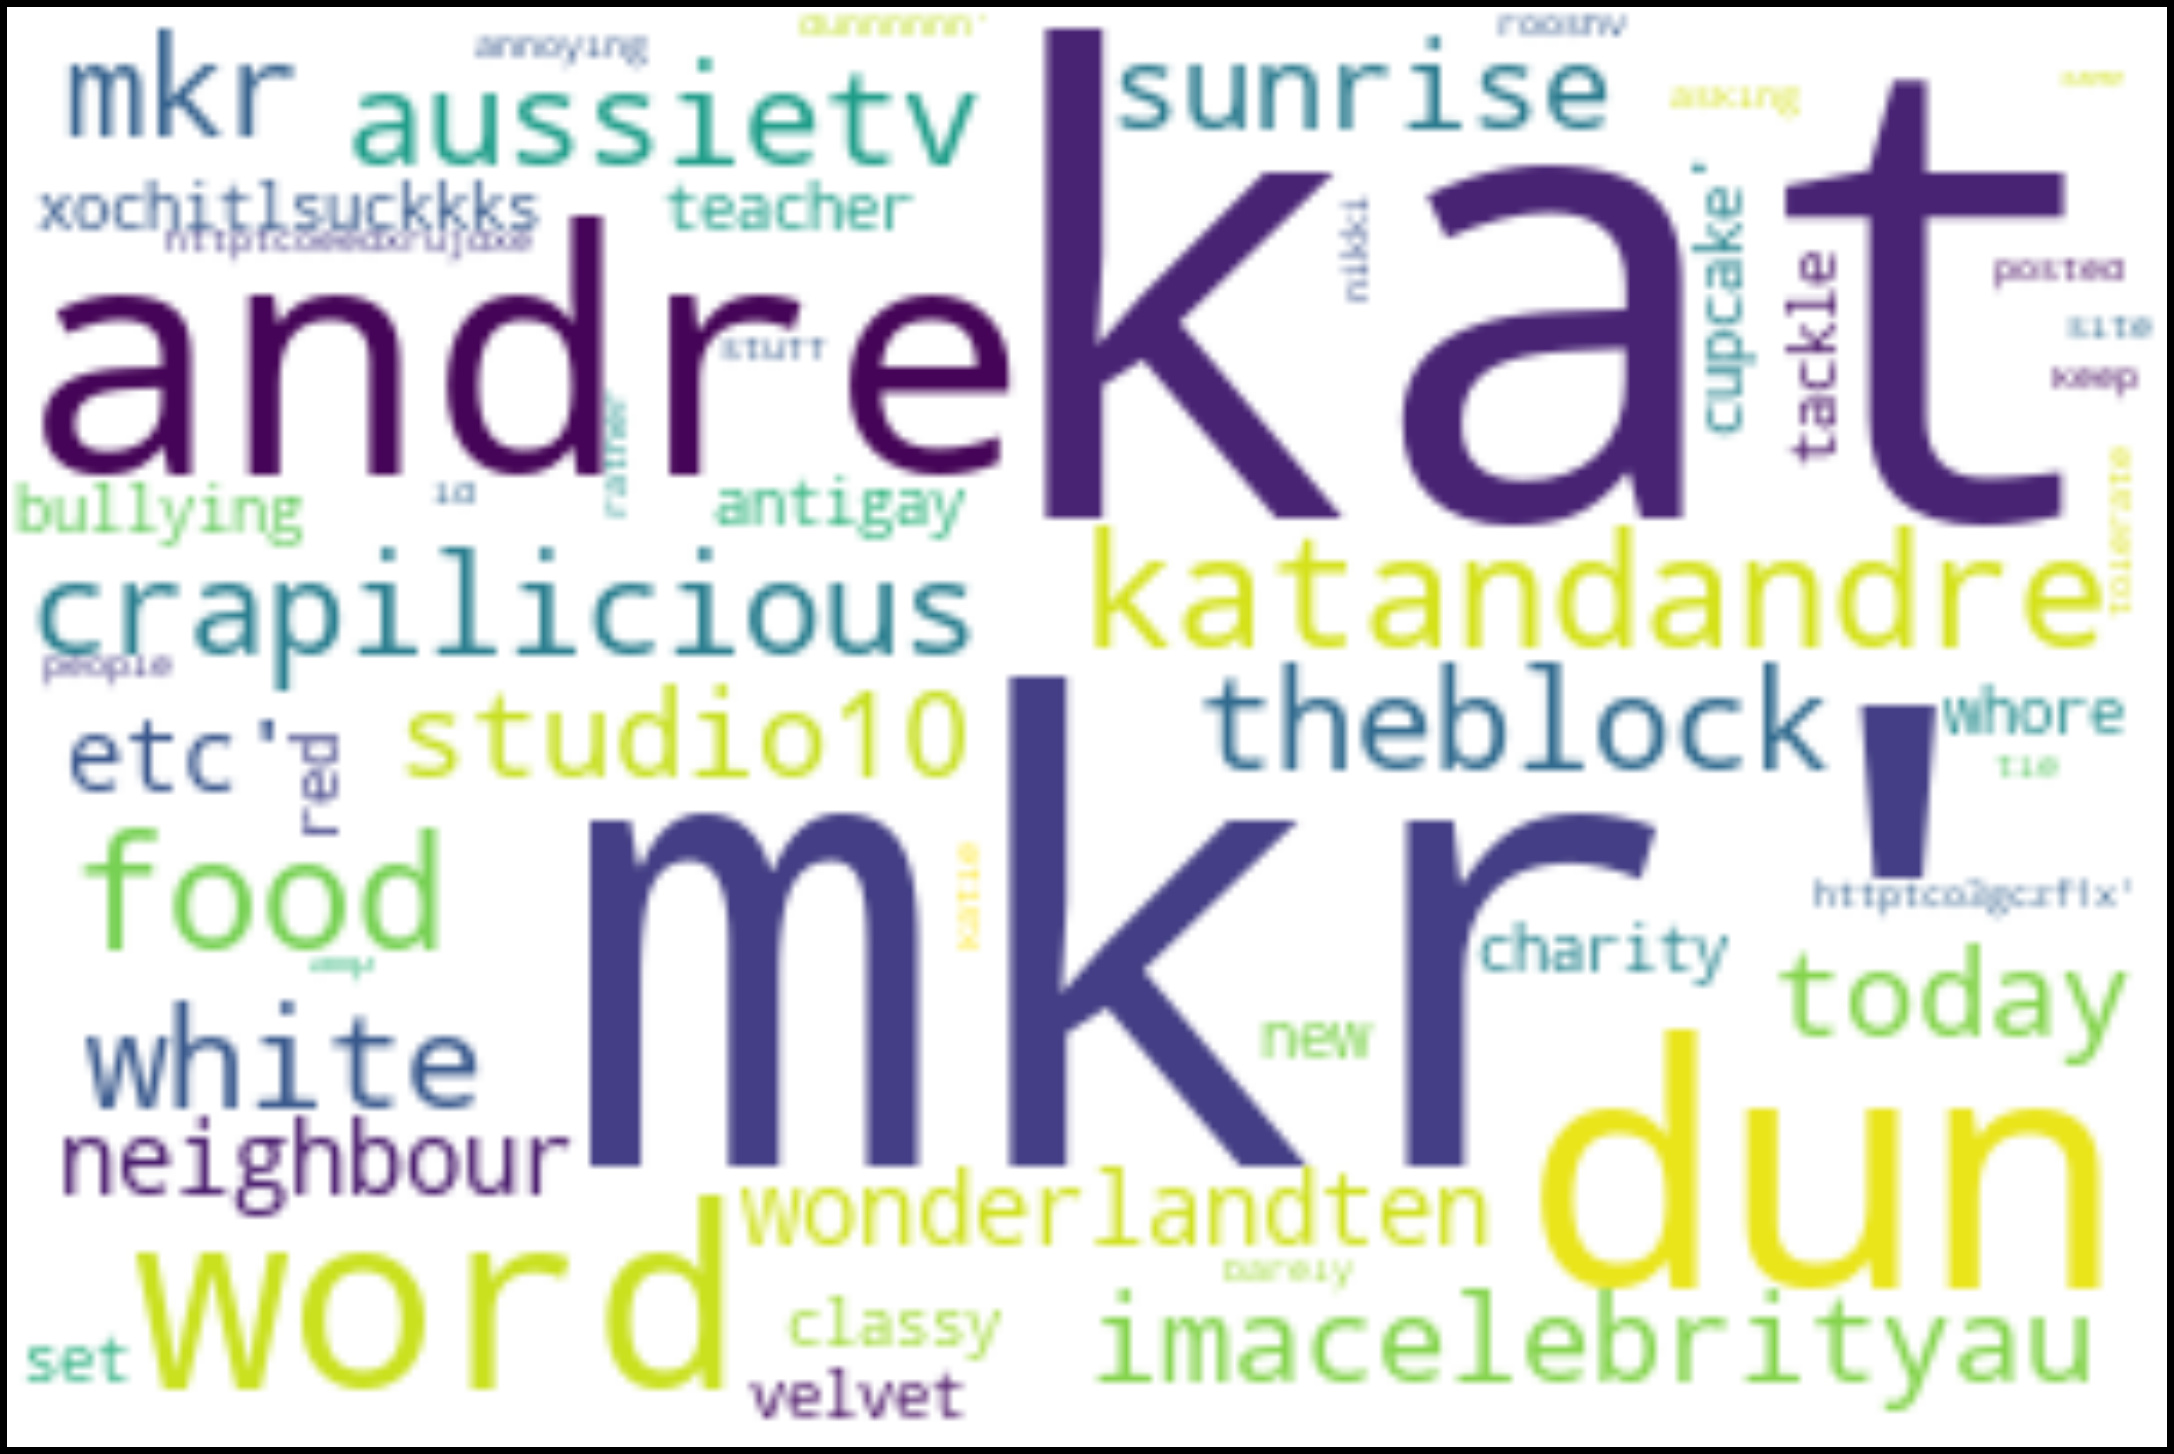

In [ ]:
#Cloud of words per category, just have to change the category of classification at first to change the cyberbullying type
type_bully=['not_cyberbullying']
df_type=df[df['cyberbullying_type'].isin(type_bully)]
text = df_type.clean_tweet.values
wordcloud = WordCloud(
    width = 300,
    height = 200,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### TF-IDF Vectorization
In this section, we vectorize our clean tweets by computing their TF-IDF matrices.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Train TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=100) # Only consider top 100 frequency words
vectorizer.fit(df["clean_tweet"])

print(len(vectorizer.vocabulary_))
print(vectorizer.vocabulary_)

100
{'word': 96, 'mkr': 56, 'white': 94, 'like': 47, 'islam': 40, 'good': 33, 'bad': 5, 'bully': 9, 'black': 7, 'school': 75, 'bullying': 10, 'rt': 72, 'year': 98, 'love': 50, 'youre': 99, 'people': 65, 'call': 11, 'hate': 36, 'know': 44, 'girl': 30, 'kid': 43, 'still': 80, 'men': 55, 'one': 64, 'going': 32, 'need': 60, 'really': 70, 'want': 92, 'get': 29, 'cant': 13, 'doesnt': 17, 'lol': 48, 'dont': 18, 'first': 23, 'time': 90, 'thing': 88, 'even': 20, 'sexist': 77, 'would': 97, 'think': 89, 'go': 31, 'look': 49, 'see': 76, 'fuck': 25, 'let': 45, 'mean': 54, 'amp': 1, 'woman': 95, 'im': 39, 'shit': 78, 'funny': 27, 'gay': 28, 'fucking': 26, 'back': 4, 'day': 15, 'as': 3, 'every': 21, 'stop': 81, 'much': 57, 'muslim': 58, 'someone': 79, 'idiot': 38, 'christian': 14, 'support': 82, 'never': 61, 'name': 59, 'thats': 87, 'didnt': 16, 'also': 0, 'say': 74, 'bullied': 8, 'take': 83, 'got': 34, 'make': 52, 'guy': 35, 'life': 46, 'made': 51, 'said': 73, 'way': 93, 'friend': 24, 'right': 71, '

In [ ]:
tfidf_matrix = vectorizer.transform(df["clean_tweet"]).toarray()

In [ ]:
df[list(vectorizer.vocabulary_.keys())] = tfidf_matrix

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [ ]:
df

tweet_text cyberbullying_type  \
0      In other words #katandandre, your food was cra...  not_cyberbullying   
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   
...                                                  ...                ...   
47687  Black ppl aren't expected to do anything, depe...          ethnicity   
47688  Turner did not withhold his disappointment. Tu...          ethnicity   
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity   
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity   
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity   

                                             clean_tweet  nb_hashtags  \
0                 word katandandre food crapilicious mkr            2   
1      aussietv white mkr theblock imacelebrityau tod...           10   
2         xochitlsuckkks classy whore red velvet cupcake            0   
3      jason_gio meh p thanks head concerned another ...            0   
4      rudhoeenglish isi account pretending kurdish a...            0   
...                                                  ...          ...   
47687  black ppl arent expected anything depended any...            0   
47688  turner withhold disappointment turner called c...            0   
47689  swear god dumb nigger bitch got bleach hair re...            0   
47690  yea fuck rt therealexel youre nigger fucking u...            0   
47691  bro u gotta chill rt chillshrammy dog fuck kp ...            0   

       nb_atts  is_rt  tweet_length  profanity_cnt  word  mkr  ...  joke  \
0            0      0            61              0   0.0  0.0  ...   0.0   
1            0      0           115              0   0.0  0.0  ...   0.0   
2            1      0            60              1   0.0  0.0  ...   0.0   
3            1      0           103              1   0.0  0.0  ...   0.0   
4            1      0           103              0   0.0  0.0  ...   0.0   
...        ...    ...           ...            ...   ...  ...  ...   ...   
47687        0      0           234              1   0.0  0.0  ...   0.0   
47688        0      0           276              3   0.0  0.0  ...   0.0   
47689        0      0           104              6   0.0  0.0  ...   0.0   
47690        1      1            90              6   0.0  0.0  ...   0.0   
47691        1      1            76              4   0.0  0.0  ...   0.0   

       racism  anything  called  terrorism   radical      rape  obama  nigger  \
0         0.0       0.0     0.0   0.000000  0.000000  0.785758    0.0     0.0   
1         0.0       0.0     0.0   0.725564  0.000000  0.000000    0.0     0.0   
2         0.0       0.0     0.0   0.000000  0.000000  0.000000    0.0     0.0   
3         0.0       0.0     0.0   0.000000  0.000000  0.000000    0.0     0.0   
4         0.0       0.0     0.0   0.000000  0.000000  0.000000    0.0     0.0   
...       ...       ...     ...        ...       ...       ...    ...     ...   
47687     0.0       0.0     0.0   0.000000  0.000000  0.000000    0.0     0.0   
47688     0.0       0.0     0.0   0.439118  0.403053  0.000000    0.0     0.0   
47689     0.0       0.0     0.0   0.000000  0.000000  0.000000    0.0     0.0   
47690     0.0       0.0     0.0   0.000000  0.000000  0.000000    0.0     0.0   
47691     0.0       0.0     0.0   0.000000  0.000000  0.000000    0.0     0.0   

       tayyoung_  
0       0.000000  
1       0.000000  
2       0.000000  
3       0.000000  
4       0.000000  
...          ...  
47687   0.000000  
47688   0.000000  
47689   0.000000  
47690   0.342904  
47691   0.000000  

[47692 rows x 108 columns]

### Binary Model
In this section, we build a first model aiming to classify tweets between cyberbullying and not, regardless of the bullying category.

In [ ]:
# First build binary target column
def is_bullying(text):
    if text == "not_cyberbullying": return 1
    else: return 0

df["is_cyberbullying"] = df["cyberbullying_type"].apply(lambda x: is_bullying(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


We can now build our models:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [ ]:
df.columns

Index(['tweet_text', 'cyberbullying_type', 'clean_tweet', 'nb_hashtags',
       'nb_atts', 'is_rt', 'tweet_length', 'profanity_cnt', 'word', 'mkr',
       ...
       'racism', 'anything', 'called', 'terrorism', 'radical', 'rape', 'obama',
       'nigger', 'tayyoung_', 'is_cyberbullying'],
      dtype='object', length=109)

In [ ]:
# Split data in training and test set
features = ["nb_hashtags","nb_atts","is_rt","tweet_length","profanity_cnt"] + list(vectorizer.vocabulary_.keys())
target = "is_cyberbullying"

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [ ]:
# Build classifier and fit
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Compute prediction score
print("Mean Accuracy:", rf.score(X_test, y_test))

Mean Accuracy: 0.8290177167417968


In [ ]:
# Compute F1-score
y_test_pred = rf.predict(X_test)
print("F1-score:", f1_score(y_test, y_test_pred))

F1-score: 0.43150923666782853


In [ ]:
# Predict on test data
y_test_pred = rf.predict(X_test)

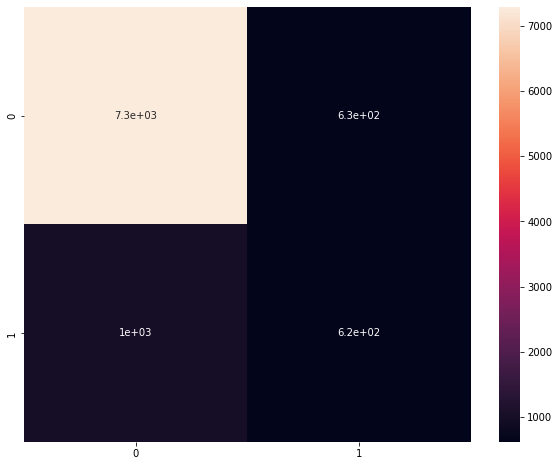

In [ ]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10,8))
sn.heatmap(conf_matrix, annot=True)
plt.show()

### Multi-Class Model
In this section, we predict the type of cyberbullying associated to each tweet.

In [ ]:
df["cyberbullying_type"].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [ ]:
# First build multi-class target column
def bullying_type(text):
    if text == "not_cyberbullying": return 0
    elif text == "gender": return 1
    elif text == "religion": return 2
    elif text == "other_cyberbullying": return 3
    elif text == "age": return 4
    else: return 5

df["cyberbullying_type_encode"] = df["cyberbullying_type"].apply(lambda x: bullying_type(x))

In [ ]:
# Split data in training and test set
features = ["nb_hashtags","nb_atts","is_rt","tweet_length","profanity_cnt"] + list(vectorizer.vocabulary_.keys())
target = "cyberbullying_type_encode"

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

### Random Forest Classifier

In [ ]:
# Build classifier and fit
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Compute prediction score
print("Mean Accuracy:", rf.score(X_test, y_test))

Mean Accuracy: 0.7801230081073526


In [ ]:
# Predict on test data
y_test_pred = rf.predict(X_test)

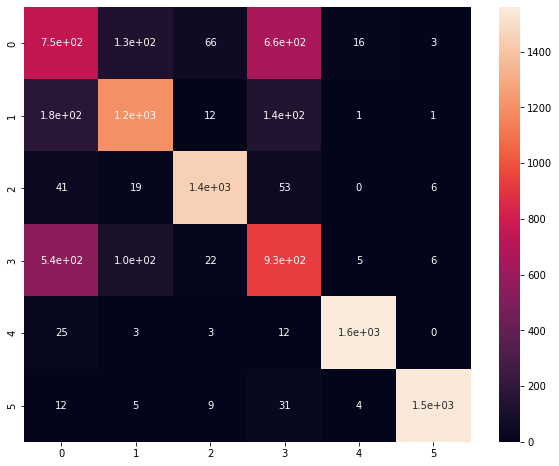

In [ ]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10,8))
sn.heatmap(conf_matrix, annot=True)
plt.show()

### Decision tree





In [ ]:
#Build decison tree classifier and fit
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

In [ ]:
#Compute prediction score
print("Mean Accuracy:", dt.score(X_test, y_test))

Mean Accuracy: 0.7464094768843694


### Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
base_cls = DecisionTreeClassifier()
bc = BaggingClassifier(base_estimator= base_cls, n_estimators=100, random_state=10).fit(X_train, y_train)

In [ ]:
#Compute prediction score
print("Mean Accuracy:", bc.score(X_test, y_test))

Mean Accuracy: 0.7728273403920747


###Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=100, random_state=1).fit(X_train, y_train)

In [ ]:
#Compute prediction score
print("Mean Accuracy:", adaboost.score(X_test, y_test))

Mean Accuracy: 0.7680050319740015


### Catboost

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.2 MB/s 


In [ ]:
import catboost as cb

In [ ]:
# Split data in training and test set
features = ["nb_hashtags","nb_atts","is_rt","tweet_length","profanity_cnt"] + list(vectorizer.vocabulary_.keys())
target = "cyberbullying_type"

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [ ]:
# Instantiate and classify
cb_classifier = cb.CatBoostClassifier()
cb_classifier.fit(X_train, y_train)

Learning rate set to 0.095275
0:	learn: 1.5694493	total: 556ms	remaining: 9m 15s
1:	learn: 1.4284748	total: 1s	remaining: 8m 21s
2:	learn: 1.3233662	total: 1.47s	remaining: 8m 9s
3:	learn: 1.2403113	total: 1.94s	remaining: 8m 2s
4:	learn: 1.1704947	total: 2.37s	remaining: 7m 51s
5:	learn: 1.1132953	total: 2.83s	remaining: 7m 48s
6:	learn: 1.0636910	total: 3.28s	remaining: 7m 45s
7:	learn: 1.0246711	total: 3.66s	remaining: 7m 34s
8:	learn: 0.9872204	total: 4.14s	remaining: 7m 36s
9:	learn: 0.9552725	total: 4.49s	remaining: 7m 24s
10:	learn: 0.9236553	total: 4.92s	remaining: 7m 22s
11:	learn: 0.8972174	total: 5.31s	remaining: 7m 17s
12:	learn: 0.8721871	total: 5.78s	remaining: 7m 18s
13:	learn: 0.8492135	total: 6.27s	remaining: 7m 21s
14:	learn: 0.8293888	total: 6.83s	remaining: 7m 28s
15:	learn: 0.8076674	total: 7.25s	remaining: 7m 26s
16:	learn: 0.7930666	total: 7.6s	remaining: 7m 19s
17:	learn: 0.7792835	total: 7.99s	remaining: 7m 15s
18:	learn: 0.7651722	total: 8.4s	remaining: 7m 13s

In [ ]:
# Compute accuracy score
y_test_pred = cb_classifier.predict(X_test)
print("Accuracy Score:",accuracy_score(y_test, y_test_pred))

Accuracy Score: 0.807946325610651


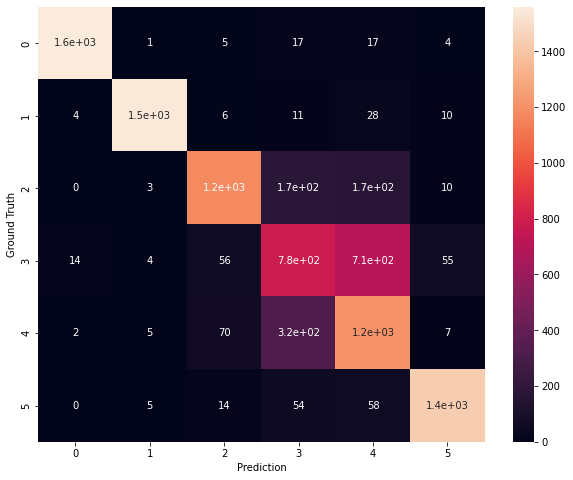

In [ ]:
# Print confusion matrix
categories = ["not_cyberbullying", "gender", "religion", "other_cyberbullying", "age", "ethnicity"]

conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10,8))
sn.heatmap(conf_matrix, annot=True)
plt.ylabel("Ground Truth")
plt.xlabel("Prediction")
plt.show()

**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Split data in training and test set
features = ["nb_hashtags","nb_atts","is_rt","tweet_length","profanity_cnt"] + list(vectorizer.vocabulary_.keys())
target = "cyberbullying_type"

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [ ]:
# Instantiate and fit
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
# Compute accuracy score and F1 score
y_test_pred = gb_classifier.predict(X_test)
print("Accuracy Score:",accuracy_score(y_test, y_test_pred))
print("F1-score:", f1_score(y_test, y_test_pred, average = "weighted"))

Accuracy Score: 0.8052206730265227
F1-score: 0.806073378640679


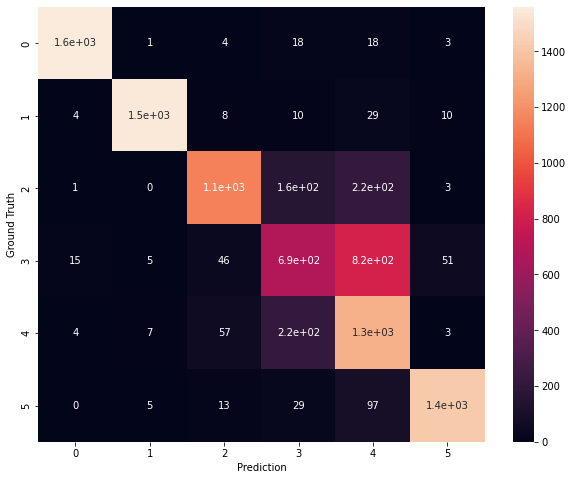

In [ ]:
# Print confusion matrix
categories = ["not_cyberbullying", "gender", "religion", "other_cyberbullying", "age", "ethnicity"]

conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10,8))
sn.heatmap(conf_matrix, annot=True)
plt.ylabel("Ground Truth")
plt.xlabel("Prediction")
plt.show()